# Decision Tree

## Imports
In this section we import the libraries necessary to analyse our data.

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay

## Import & Pre-process Data
https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/data

In [2]:
# Read in data
df=pd.read_csv("cardio_train.csv", sep=";")

# Drop unnecessary columns
df = df.dropna(axis=0)
df = df.drop('id', axis=1)

# Drop weights below 40kg
for weight in df['weight']:
    if weight < 40:
        df['weight'] = df['weight'].drop(axis=0, index=0)

def categorize_weight(weight):
    if 40 <= weight <= 60:
        return '40 - 60'
    elif 61 <= weight <= 80:
        return '61 - 80'
    elif 81 <= weight <= 100:
        return '81 - 100'
    else:
        return '100+'

df['weight_category'] = df['weight'].apply(categorize_weight)

# Get average blood pressure using high and low values
df['bp_mean'] = df[['ap_hi', 'ap_lo']].mean(axis=1)

# Categorize average blood pressure for classification
def categorize_bp(mean_bp):
    if mean_bp > 120:
        return 'High'
    elif mean_bp >= 80:
        return 'Normal'
    else:
        return 'Low'

# Apply the categorization function
df['bp_category'] = df['bp_mean'].apply(categorize_bp)

# Convert ages to years
df['ages_year'] = df['age'] // 365

# Categorize ages into age groups
def categorize_age(ages_year):
    if ages_year < 18:
        return 'Under 18'
    elif 18 <= ages_year <= 21:
        return '18-21'
    elif 21 < ages_year <= 40:
        return '21-40'
    elif 40 < ages_year <= 60:
        return '41-60'
    elif 60 < ages_year <= 80:
        return '61-80'
    else:
        return '80+'

# Apply categorization 
df['age_category'] = df['ages_year'].apply(categorize_age)

# Function to categorize height
def categorize_height(height):
    if height < 150:
        return 'Short'
    elif 150 <= height <= 170:
        return 'Average'
    elif 171 <= height <= 190:
        return 'Tall'
    else:
        return 'Very Tall'

# Apply categorization to height
df['height_category'] = df['height'].apply(categorize_height)

# Encode ages
encoder = LabelEncoder()
df['weight_category_encoded'] = encoder.fit_transform(df['weight_category'])
df['bp_category_encoded'] = encoder.fit_transform(df['bp_category'])
df['age_category_encoded'] = encoder.fit_transform(df['age_category'])
df['height_category_encoded'] = encoder.fit_transform(df['height_category'])

df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,...,weight_category,bp_mean,bp_category,ages_year,age_category,height_category,weight_category_encoded,bp_category_encoded,age_category_encoded,height_category_encoded
0,18393,2,168,NaN,110,80,1,1,0,0,...,100+,95.0,Normal,50,41-60,Average,0,2,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,...,81 - 100,115.0,Normal,55,41-60,Average,3,2,1,0
2,18857,1,165,64.0,130,70,3,1,0,0,...,61 - 80,100.0,Normal,51,41-60,Average,2,2,1,0
3,17623,2,169,82.0,150,100,1,1,0,0,...,81 - 100,125.0,High,48,41-60,Average,3,0,1,0
4,17474,1,156,56.0,100,60,1,1,0,0,...,40 - 60,80.0,Normal,47,41-60,Average,1,2,1,0


## Fit Data

In [ ]:
# Split data into training and testing
X = df[['gender', 'weight_category_encoded', 'height_category_encoded', 'age_category_encoded',  'bp_category_encoded', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']]
Y = df['cardio']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of trees
    'max_depth': [10, 20, 30, None],         # Depth of trees
    'min_samples_split': [2, 5, 10],         # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],           # Min samples at leaf
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider
    'bootstrap': [True, False]               # Use bootstrap sampling
}

tree = RandomForestClassifier()

grid_search = GridSearchCV(estimator=tree, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, Y_train)

best_rf = grid_search.best_estimator_
print("Best Parameters: ", grid_search.best_params_)
# Define tree model and fit data
tree.fit(X_train, Y_train)

# Use tree to predict and display accuracy
Y_pred = tree.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

## Display Data

In [86]:
print(f"Accuracy: {accuracy_score(Y_test, Y_pred):.2f}")
print(f"Precision: {precision_score(Y_test, Y_pred):.2f}")
print(f"Recall: {recall_score(Y_test, Y_pred):.2f}")
print(f"F1-Score: {f1_score(Y_test, Y_pred):.2f}")

Accuracy: 0.66
Precision: 0.69
Recall: 0.56
F1-Score: 0.62


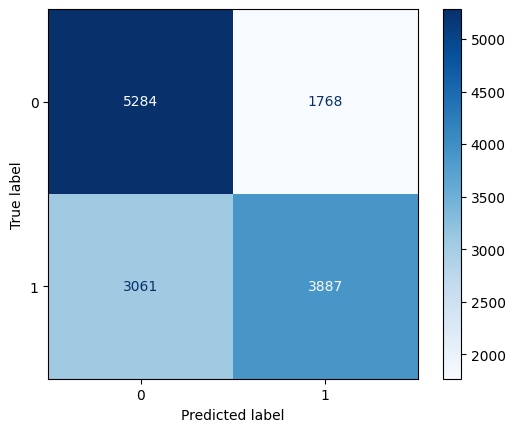

In [87]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred, cmap='Blues')